# Imports

In [1]:
import plotting
import loading
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import numpy as np

## Load files

In [2]:
folder = '/home/gizem/Documents/Gitkraken/arm-paper/DataOutput/csv'
file = 'gizem_test.csv' 
csv_filename = os.path.join(folder, file)
df = pd.read_csv(csv_filename)

print(df.head(3))
# print(df['ID_ELAPSED_TIME'].head(5))

   ID_ELAPSED_TIME                                           ID_LHAND  \
0         0.007384                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1         0.123605  [0.04422809650764403, 0.7467985483932414, -0.0...   
2         0.123664  [0.04422809650764403, 0.7467985483932414, -0.0...   

                                            ID_RHAND  \
0                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  [-0.002263304265068433, -0.7484309455283297, -...   
2  [-0.002263304265068433, -0.7484309455283297, -...   

                                             ID_HAND  \
0                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  [0.007319046060465628, -0.05999208772907274, 0...   
2  [0.007319046060465628, -0.05999208772907274, 0...   

                                            ID_TGOAL  \
0                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  [0.3977502095164465, -0.0005561541989879126, 0...   
2  [0.3977502095164465, -0.0005561541989879126, 0...   

                                

In [ ]:
print(type(df.ID_ELAPSED_TIME[0]))

In [ ]:
arr = df['ID_HAND'][0].split(',')
arr = [float(x.strip('[],')) for x in arr]
print(arr)

In [26]:
lhand = []
rhand = []
hand = []
tgoal = []
tactual = []
for index,row in df.iterrows():
    temp_arr = df['ID_LHAND'][index].split(',')
    lhand.append([float(x.strip('[],')) for x in temp_arr])
    temp_arr = df['ID_RHAND'][index].split(',')
    rhand.append([float(x.strip('[],')) for x in temp_arr])
    temp_arr = df['ID_HAND'][index].split(',')
    hand.append([float(x.strip('[],')) for x in temp_arr])
    temp_arr = df['ID_TGOAL'][index].split(',')
    tgoal.append([float(x.strip('[],')) for x in temp_arr])
    temp_arr = df['ID_TACTUAL'][index].split(',')
    tactual.append([float(x.strip('[],')) for x in temp_arr])

lhand_df = pd.DataFrame(lhand, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
rhand_df = pd.DataFrame(rhand, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
hand_df = pd.DataFrame(hand, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
tgoal_df = pd.DataFrame(tgoal, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
tactual_df = pd.DataFrame(tactual, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
# df['ID_LHAND'] = np.array(lhand)
# df['ID_RHAND'] = np.array(rhand)
# df['ID_HAND'] = np.array(hand)
# df['ID_TGOAL'] = np.array(tgoal)
# df['ID_TACTUAL'] = np.array(tactual)

## Plotting

Text(0, 0.5, 'position (cm)')

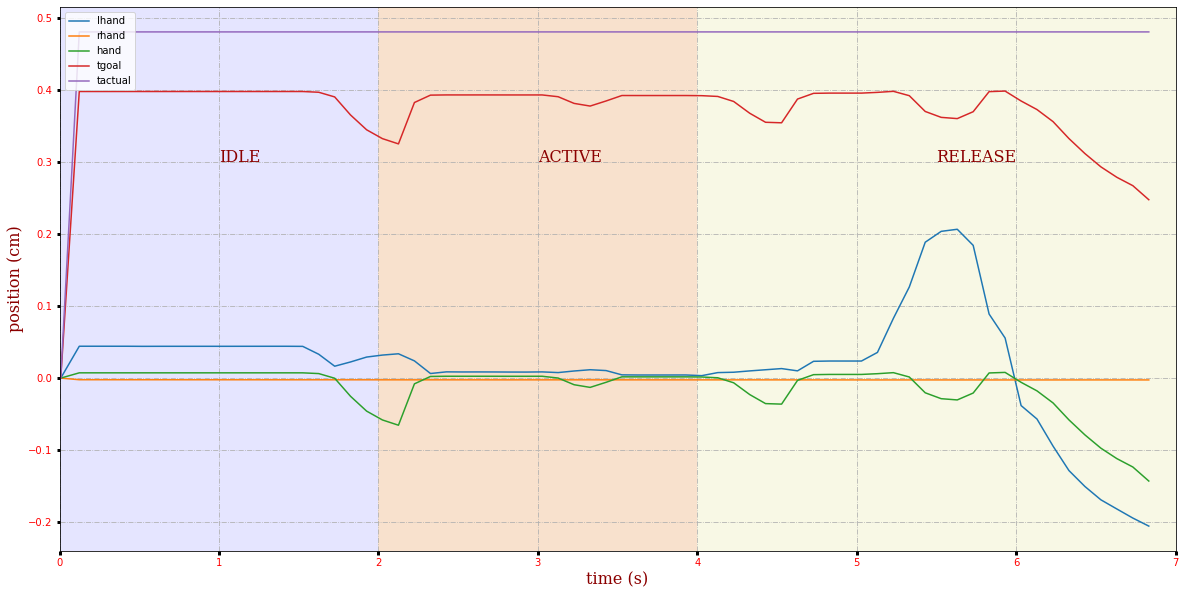

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xlim([0, 7])
ax.plot(df.ID_ELAPSED_TIME, lhand_df.pos_x, label='lhand')
ax.plot(df.ID_ELAPSED_TIME, rhand_df.pos_x, label='rhand')
ax.plot(df.ID_ELAPSED_TIME, hand_df.pos_x, label='hand')
ax.plot(df.ID_ELAPSED_TIME, tgoal_df.pos_x, label='tgoal')
ax.plot(df.ID_ELAPSED_TIME, tactual_df.pos_x, label='tactual')
ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.legend(loc='upper left')

plt.axvspan(0, 2, facecolor='b', alpha=0.1)
plt.axvspan(2, 4, facecolor='r', alpha=0.1)
plt.axvspan(2, 7, facecolor='y', alpha=0.1)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.text(1, 0.3, 'IDLE', fontdict=font)
plt.text(3, 0.3, 'ACTIVE', fontdict=font)
plt.text(5.5, 0.3, 'RELEASE', fontdict=font)
plt.xlabel('time (s)', fontdict=font)
plt.ylabel('position (cm)', fontdict=font)